In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
import datetime as dt
%matplotlib inline

In [2]:
donations = pd.read_csv('donations.csv')

In [3]:
donations.head()

,id,created_at,amount
0,00000ce845c00cbf0686c992fc369df4,2013-12-17 21:47:14,50.00
1,00002783bc5d108510f3f9666c8b1edd,2016-02-02 18:34:27,99.00
2,00002d44003ed46b066607c5455a999a,2016-10-25 20:15:11,10.00
3,00002d44003ed46b066607c5455a999a,2017-01-16 01:11:20,15.51
4,00002d44003ed46b066607c5455a999a,2017-01-16 14:20:10,100.00


In [4]:
donations['created_at'] = pd.to_datetime(donations['created_at'])

In [5]:
donations = donations.sort_values('created_at').reset_index(drop=True)

In [6]:
len(donations['id'].unique())

2024554

In [7]:
donations.head()

,id,created_at,amount
0,fcf96e729bf1b03dfbd8f07a3b4ee173,2012-10-08 13:53:00,25.0
1,ea1db63aa514055a1faa005e4f37df5f,2012-10-08 18:44:11,50.0
2,1b86abc5689d125dbb06c9f9e99c8567,2012-10-08 19:22:22,30.0
3,adb85b01032ff78cbad5304d10a09ea8,2012-10-08 19:32:55,20.0
4,f5c13e4c10889c2d171d955e9908859e,2012-10-08 19:34:08,10.0


In [8]:
donations['day'] = donations['created_at'].dt.day

In [9]:
donations['month'] = donations['created_at'].dt.month

In [10]:
donations['year'] = donations['created_at'].dt.year

In [11]:
donations['date'] = donations['created_at'].dt.date

In [12]:
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687884 entries, 0 to 4687883
Data columns (total 7 columns):
id            object
created_at    datetime64[ns]
amount        float64
day           int64
month         int64
year          int64
date          object
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 250.4+ MB


In [13]:
donations[donations['date']=='2012-10-20']

,id,created_at,amount,day,month,year,date


In [14]:
more_than_one = donations['id'].value_counts()>200

In [15]:
more_than_one_ids = donations['id'].value_counts()[more_than_one].index

In [16]:
more_than_one_df = donations[donations['id'].isin(more_than_one_ids)]

In [17]:
more_than_one_df.shape

(580439, 7)

In [18]:
only_one_df = donations.drop(more_than_one_df.index)

In [19]:
only_one_df.shape

(4107445, 7)

In [20]:
max(donations['amount'])

60000.0

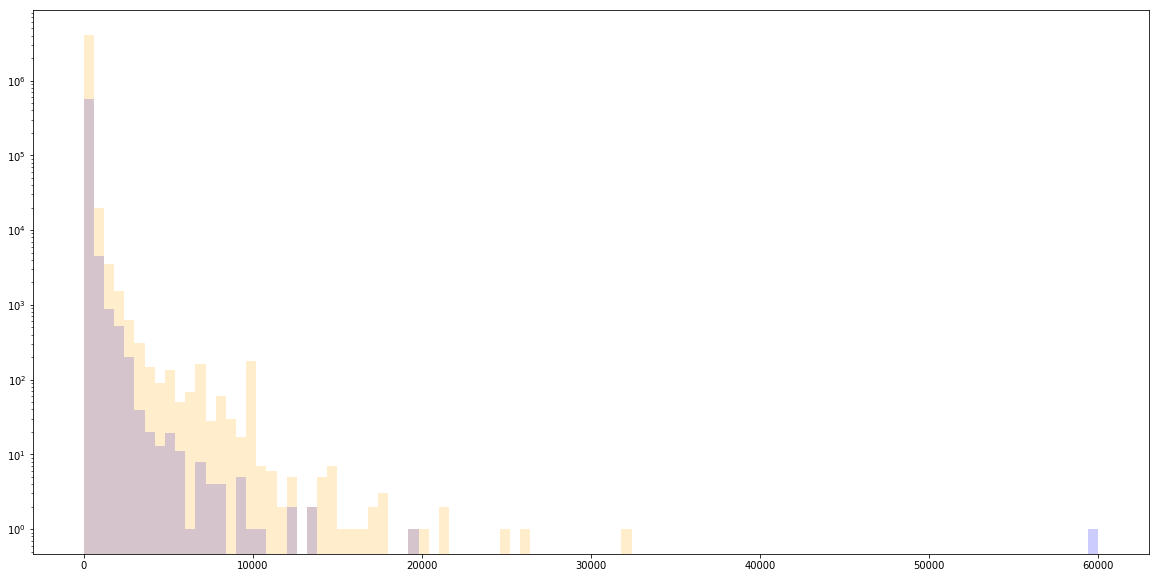

In [21]:
plt.figure(figsize=(20, 10))
bins=np.histogram(np.hstack((more_than_one_df['amount'],only_one_df['amount'])), bins=100)[1]
plt.hist(more_than_one_df['amount'], bins, alpha = 0.2, color = 'blue')
plt.hist(only_one_df['amount'], bins, alpha = 0.2, color = 'orange')
plt.yscale('log');

In [22]:
more_than_one_df['date'] = more_than_one_df['created_at'].dt.date

/Users/maheshrao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
more_than_one_date_gb = more_than_one_df.groupby('date').count().reset_index()

In [24]:
only_one_df['date'] = only_one_df['created_at'].dt.date
only_one_date_gb = only_one_df.groupby('date').count().reset_index()

In [25]:
more_than_one_date_gb.head()

,date,id,created_at,amount,day,month,year
0,2012-11-28,2,2,2,2,2,2
1,2013-01-01,16,16,16,16,16,16
2,2013-01-02,16,16,16,16,16,16
3,2013-01-03,19,19,19,19,19,19
4,2013-01-04,22,22,22,22,22,22


In [26]:
(more_than_one_date_gb.loc[1, 'date'] - more_than_one_date_gb.loc[0, 'date']).days

34

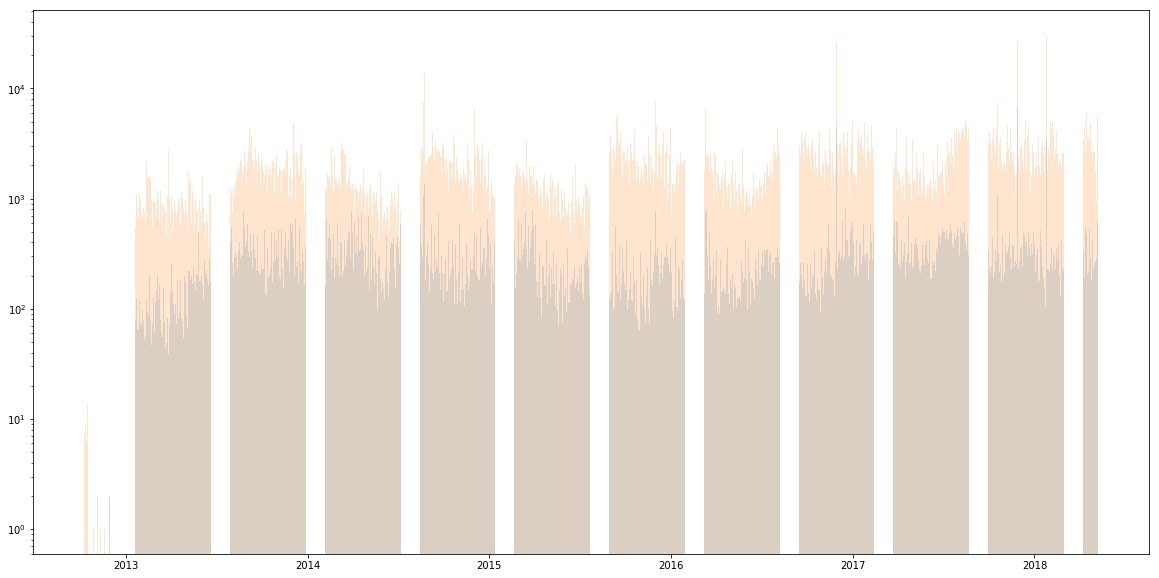

In [27]:
plt.figure(figsize=(20, 10))
plt.bar(more_than_one_date_gb['date'], more_than_one_date_gb['id'], alpha = 0.2)
plt.bar(only_one_date_gb['date'], only_one_date_gb['id'], alpha = 0.2)
plt.yscale('log');

In [28]:
more_than_one_mean_give = more_than_one_df.groupby('id').agg('mean').reset_index()

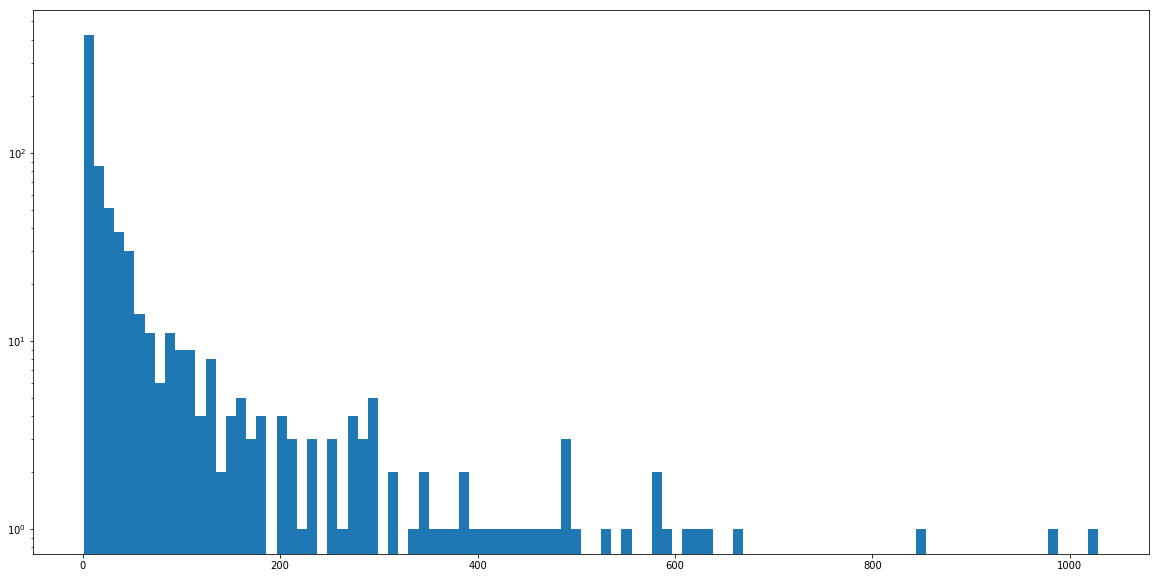

In [29]:
plt.figure(figsize=(20, 10))
plt.hist(more_than_one_mean_give['amount'], bins = 100)
plt.yscale('log');

In [30]:
more_than_one_df.describe()

,amount,day,month,year
count,580439.000000,580439.000000,580439.000000,580439.000000
mean,40.025505,16.217601,6.462064,2015.397215
std,183.395504,8.957168,3.507693,1.578427
min,0.210000,1.000000,1.000000,2012.000000
25%,1.000000,8.000000,3.000000,2014.000000
50%,2.000000,17.000000,7.000000,2015.000000
75%,12.000000,24.000000,9.000000,2017.000000
max,60000.000000,31.000000,12.000000,2018.000000


In [31]:
only_one_df.describe()

,amount,day,month,year
count,4.107445e+06,4.107445e+06,4.107445e+06,4.107445e+06
mean,6.358597e+01,1.625111e+01,6.765929e+00,2.015614e+03
std,1.642260e+02,8.803581e+00,3.589809e+00,1.528993e+00
min,1.000000e-02,1.000000e+00,1.000000e+00,2.012000e+03
25%,2.000000e+01,9.000000e+00,3.000000e+00,2.014000e+03
50%,2.716000e+01,1.700000e+01,8.000000e+00,2.016000e+03
75%,5.000000e+01,2.400000e+01,1.000000e+01,2.017000e+03
max,3.185660e+04,3.100000e+01,1.200000e+01,2.018000e+03


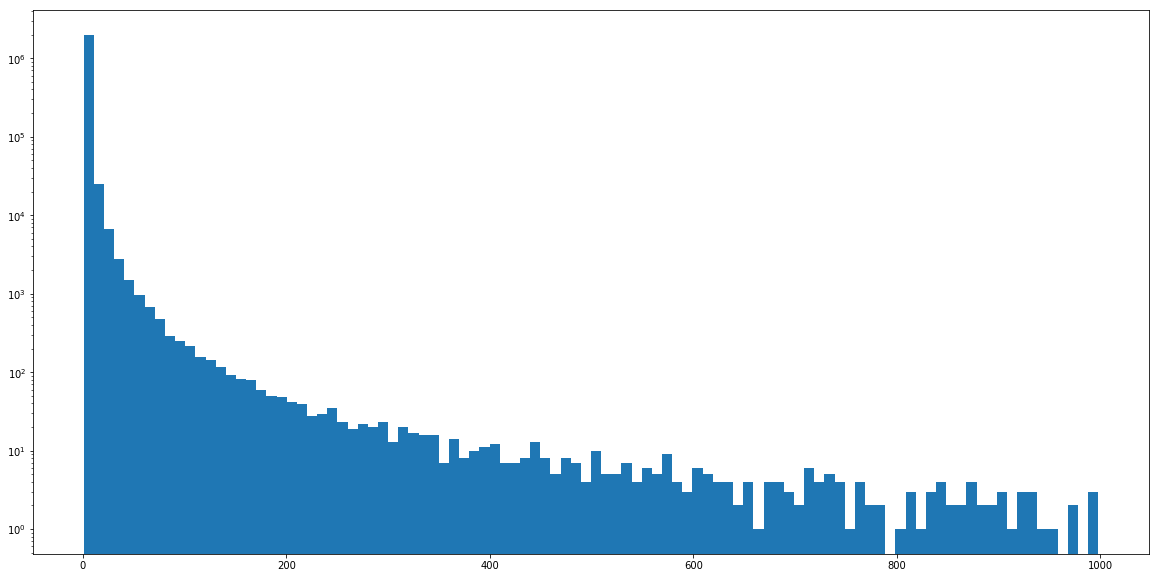

In [32]:
plt.figure(figsize=(20, 10))
donations_vc = donations['id'].value_counts()
donations_vc_100 = donations_vc[donations_vc <= 1000]
plt.hist(donations_vc_100, bins = 100)
plt.yscale('log');
# plt.xlim(right=100);

In [33]:
gb_year_list = list(donations.groupby('year'))

In [34]:
new_donor_year = {}
returning_donor_year = {}
sustaining_donor = []
for year, df in list(donations.groupby('year')):
    print(year)
    if len(new_donor_year) > 0:
        prev_donors = [i for l in list(new_donor_year.values()) for i in l]
        current_donors = list(df['id'].unique())
        returning_donors = list(set(current_donors)&set(prev_donors))#[i for i in current_donors if i in prev_donors]
        new_donors = list(set(current_donors)-set(prev_donors))#[i for i in current_donors if i not in prev_donors]
        sustaining_donor = list(set(sustaining_donor)&set(returning_donors)) + new_donors#[i for i in sustaining_donor if i in returning_donors]
        new_donor_year[year] = new_donors
        returning_donor_year[year] = returning_donors
        
    else:
        new_donor_year[year] = list(df['id'].unique())
        returning_donor_year[year] = []
        sustaining_donor = new_donor_year[year]

2012
2013
2014
2015
2016
2017
2018


New Donors = Never donated before
Returning Donor = Donated last year
Sustaining Donor = Returning Donors + New Donors

In [35]:
len(sustaining_donor)

201200

In [36]:
sustaining_sub = donations[donations['id'].isin(sustaining_donor)]

In [37]:
not_sustaining_sub = donations.drop(sustaining_sub.index)

In [38]:
total_sustaining_sub_amount = sum(sustaining_sub['amount'])
total_not_sustaining_sub_amount = sum(not_sustaining_sub['amount'])

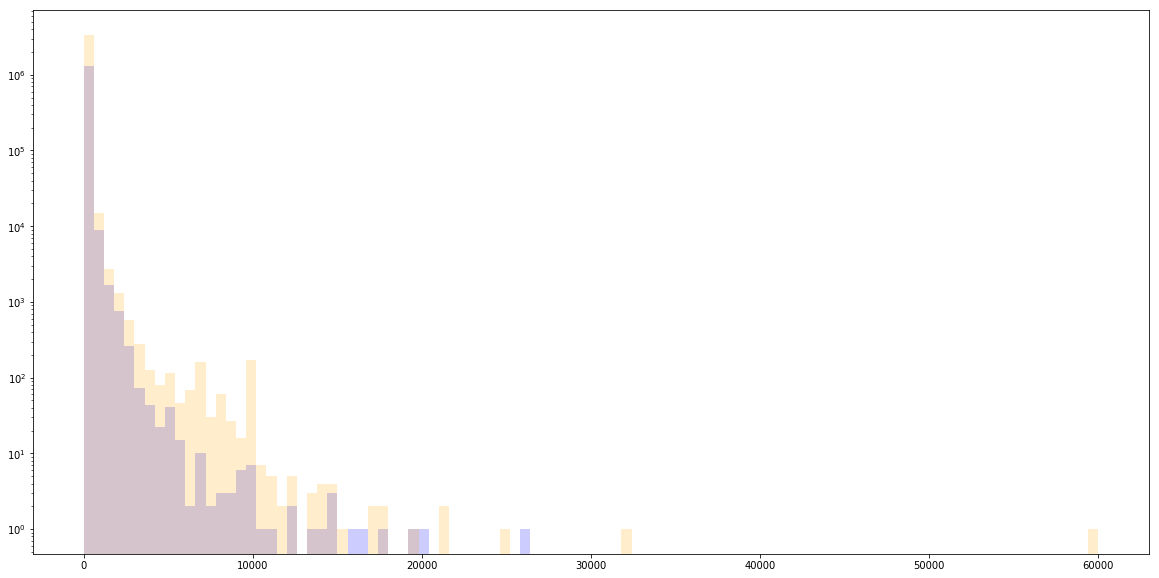

In [39]:
plt.figure(figsize=(20, 10))
bins=np.histogram(np.hstack((sustaining_sub['amount'],not_sustaining_sub['amount'])), bins=100)[1]
plt.hist(sustaining_sub['amount'], bins, alpha = 0.2, color = 'blue')
plt.hist(not_sustaining_sub['amount'], bins, alpha = 0.2, color = 'orange')
plt.yscale('log');

In [40]:
sustaining_sub['date'] = sustaining_sub['created_at'].dt.date
sustaining_sub_date_gb = sustaining_sub.groupby('date').sum().reset_index()
not_sustaining_sub['date'] = not_sustaining_sub['created_at'].dt.date
not_sustaining_sub_date_gb = not_sustaining_sub.groupby('date').sum().reset_index()

/Users/maheshrao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


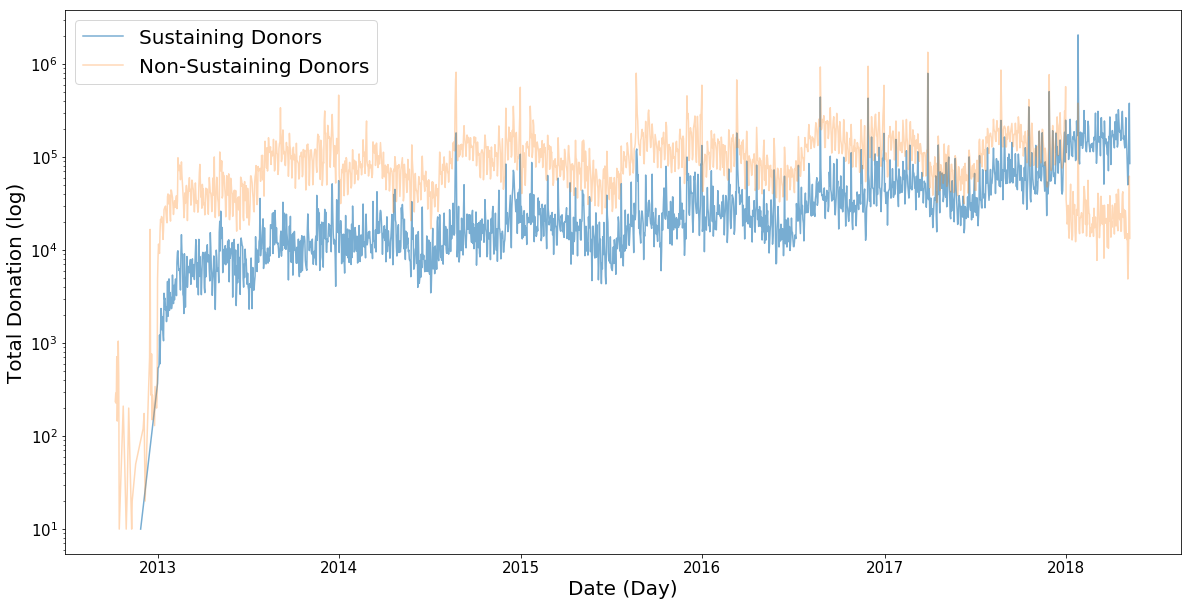

In [41]:
plt.figure(figsize=(20, 10))
plt.plot(sustaining_sub_date_gb['date'], sustaining_sub_date_gb['amount'], alpha = 0.6)
plt.plot(not_sustaining_sub_date_gb['date'], not_sustaining_sub_date_gb['amount'], alpha = 0.3)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Total Donation (log)', fontsize = 20)
plt.xlabel('Date (Day)', fontsize = 20)
plt.legend(('Sustaining Donors',
            'Non-Sustaining Donors'), fontsize = 20);

In [42]:
sustaining_sub_date_gb['date_ord'] = sustaining_sub_date_gb['date'].map(dt.datetime.toordinal)

In [43]:
not_sustaining_sub_date_gb['date_ord'] = not_sustaining_sub_date_gb['date'].map(dt.datetime.toordinal)

In [44]:
sustaining_sub_date_gb_2013_2018 = sustaining_sub_date_gb[~sustaining_sub_date_gb['date'].astype(str).str.contains('2012')]

In [45]:
not_sustaining_sub_date_gb_2013_2018 = not_sustaining_sub_date_gb[~not_sustaining_sub_date_gb['date'].astype(str).str.contains('2012')]

In [46]:
slope, intercept, r_value, p_value, std_err = linregress(sustaining_sub_date_gb_2013_2018['date_ord'],sustaining_sub_date_gb_2013_2018['amount'])
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = linregress(not_sustaining_sub_date_gb_2013_2018['date_ord'],not_sustaining_sub_date_gb_2013_2018['amount'])

In [47]:
through_2020 = pd.date_range(start='1/1/2018', end='1/1/2022').to_frame()

In [48]:
through_2020['date_ord'] = through_2020[0].map(dt.datetime.toordinal)

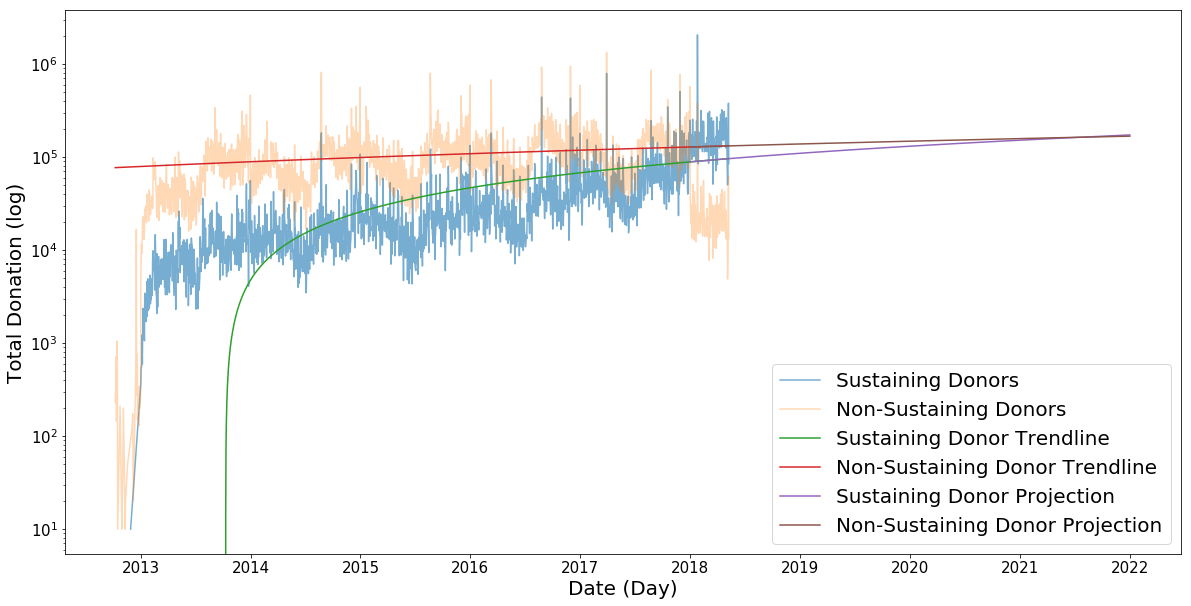

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(sustaining_sub_date_gb['date'], sustaining_sub_date_gb['amount'], alpha = 0.6)
plt.plot(not_sustaining_sub_date_gb['date'], not_sustaining_sub_date_gb['amount'], alpha = 0.3)
plt.plot(sustaining_sub_date_gb['date_ord'], slope*sustaining_sub_date_gb['date_ord']+intercept)
plt.plot(not_sustaining_sub_date_gb['date_ord'], slope_2*not_sustaining_sub_date_gb['date_ord']+intercept_2)
plt.plot(through_2020['date_ord'], slope*through_2020['date_ord']+intercept)
plt.plot(through_2020['date_ord'], slope_2*through_2020['date_ord']+intercept_2)
#plt.ylim(top=800000);
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Total Donation (log)', fontsize = 20)
plt.xlabel('Date (Day)', fontsize = 20)
plt.legend(('Sustaining Donors',
            'Non-Sustaining Donors',
            'Sustaining Donor Trendline',
            'Non-Sustaining Donor Trendline',
            'Sustaining Donor Projection',
            'Non-Sustaining Donor Projection'), fontsize = 20);

In [50]:
100*0.12

12.0

In [51]:
11.6 + 32.4 + 56

100.0

---

In [52]:
donor_pyramid_year = {}
for year, df in list(donations.groupby('year')):
    df_id_gb_sum = df.groupby('id').sum().sort_values('amount', ascending=False).reset_index()
    total_rows = len(df_id_gb_sum)
    top_12_pct = df_id_gb_sum.loc[:round(total_rows*0.116)]
    top_12_pct_list = list(top_12_pct['id'])
    df_id_gb_sum = df_id_gb_sum.drop(top_12_pct.index)
    next_32_pct = df_id_gb_sum.loc[:round(total_rows*0.324)]
    next_32_pct_list = next_32_pct['id'].tolist()
    the_rest = df_id_gb_sum.drop(next_32_pct.index)['id'].tolist()
    donor_pyramid_year[year] = {'top': top_12_pct_list, 'middle': next_32_pct_list, 'bottom': the_rest}

In [53]:
len(list(set(donor_pyramid_year[2014]['middle'])&set(donor_pyramid_year[2013]['top'])))

3814

In [55]:
stayed_the_same = {}
for i in ['top', 'middle', 'bottom']:
    stayed_the_same[i] = list(set(donor_pyramid_year[2014][i])&
         set(donor_pyramid_year[2015][i])&
         set(donor_pyramid_year[2016][i])&
         set(donor_pyramid_year[2017][i]))
    

In [56]:
stayed_the_same['top'][:10]

['abbb4465a09085e6ac08d17c98d6fd2f',
 'c99a7df07521aa19d8aa0615750330ff',
 '333cf00ef84d81d783bc83b811c0cf2c',
 '0d2a1410e66223525952ffd3141c360b',
 '4baf050ed274d528d8996143168c350c',
 '5528a4717a3a92d8f52816b6d8a10f78',
 '4942150e351df37d02b1b1008032d795',
 'e102e6ea740b6629423dbb958e07344e',
 '2c1d2cd0faf7809c503c3fc25c88237a',
 'ca66910ed81ac6c7cb000e81c193dd0b']

In [57]:
top_sub = donations[donations['id'].isin(stayed_the_same['top'])]
middle_sub = donations[donations['id'].isin(stayed_the_same['middle'])]
bottom_sub = donations[donations['id'].isin(stayed_the_same['bottom'])]

In [58]:
top_sub_gb_sum = top_sub.groupby('id').sum()['amount'].reset_index()
middle_sub_gb_sum = middle_sub.groupby('id').sum()['amount'].reset_index()
bottom_sub_gb_sum = bottom_sub.groupby('id').sum()['amount'].reset_index()

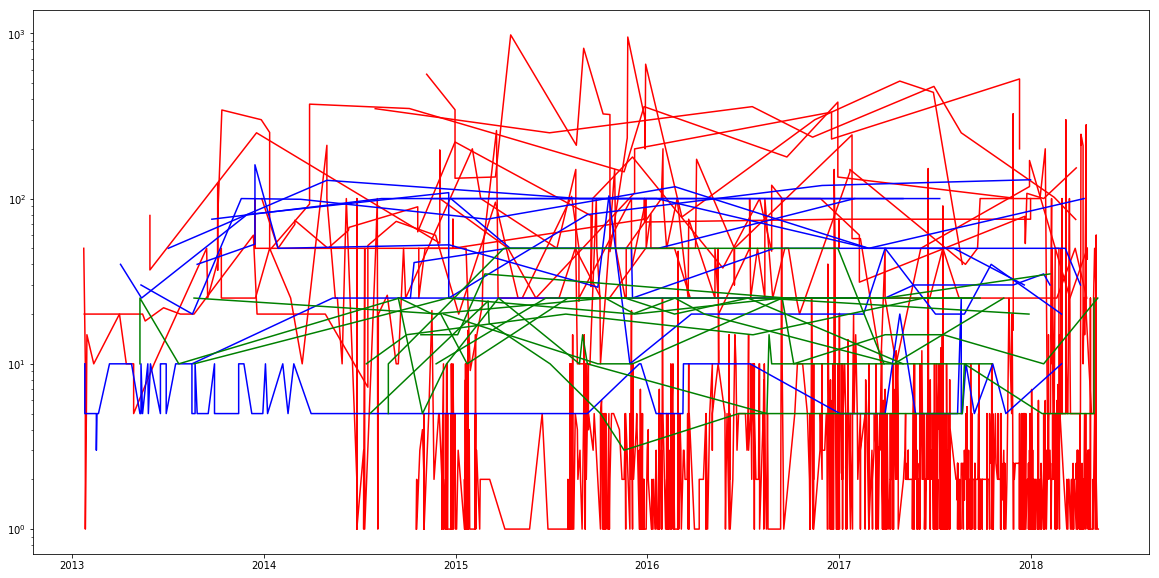

In [59]:
plt.figure(figsize=(20, 10))
for i in stayed_the_same['top'][:10]:
    plt.plot(top_sub[top_sub['id']==i]['date'], top_sub[top_sub['id']==i]['amount'], color='red')
for i in stayed_the_same['middle'][:10]:
    plt.plot(middle_sub[middle_sub['id']==i]['date'], middle_sub[middle_sub['id']==i]['amount'], color='blue')
for i in stayed_the_same['bottom'][:10]:
    plt.plot(bottom_sub[bottom_sub['id']==i]['date'], bottom_sub[bottom_sub['id']==i]['amount'], color='green')
plt.yscale('log')
plt.show();


In [60]:
len(donor_pyramid_year[2013]['top'])

37133

In [61]:
donations.head()

,id,created_at,amount,day,month,year,date
0,fcf96e729bf1b03dfbd8f07a3b4ee173,2012-10-08 13:53:00,25.0,8,10,2012,2012-10-08
1,ea1db63aa514055a1faa005e4f37df5f,2012-10-08 18:44:11,50.0,8,10,2012,2012-10-08
2,1b86abc5689d125dbb06c9f9e99c8567,2012-10-08 19:22:22,30.0,8,10,2012,2012-10-08
3,adb85b01032ff78cbad5304d10a09ea8,2012-10-08 19:32:55,20.0,8,10,2012,2012-10-08
4,f5c13e4c10889c2d171d955e9908859e,2012-10-08 19:34:08,10.0,8,10,2012,2012-10-08


---

In [68]:
top_donor = donations['id'].value_counts().head(1).index[0]

In [69]:
top_donor

'39df9399f5384334a42905bcf0acdcbf'

In [70]:
top_donor_df = donations[donations['id']==top_donor]

In [71]:
top_donor_df.shape

(18035, 7)

In [72]:
top_donor_df[top_donor_df['amount']==1].shape

(13485, 7)

In [73]:
sum(top_donor_df['amount'])

37121.72000000007

In [74]:
top_donor_df['amount'].value_counts()[top_donor_df['amount'].value_counts()==1].sort_index()

1.96      1
2.58      1
2.69      1
2.77      1
2.84      1
2.91      1
2.99      1
3.01      1
3.03      1
3.07      1
3.11      1
3.14      1
3.17      1
3.50      1
3.58      1
3.63      1
3.66      1
3.70      1
3.74      1
3.77      1
3.81      1
3.87      1
3.92      1
3.93      1
3.96      1
4.07      1
4.08      1
4.09      1
4.14      1
4.19      1
         ..
34.77     1
34.79     1
35.14     1
35.89     1
36.34     1
37.08     1
38.33     1
38.77     1
40.36     1
40.78     1
41.31     1
41.63     1
41.96     1
42.74     1
43.80     1
44.63     1
45.64     1
47.27     1
47.52     1
48.25     1
51.24     1
51.27     1
51.80     1
53.83     1
54.18     1
60.08     1
81.25     1
126.79    1
179.95    1
296.33    1
Name: amount, Length: 579, dtype: int64

In [75]:
top_donor_df_one = donations[(donations['id']==top_donor)&(donations['amount']==1)]

In [76]:
top_donor_df.shape

(18035, 7)

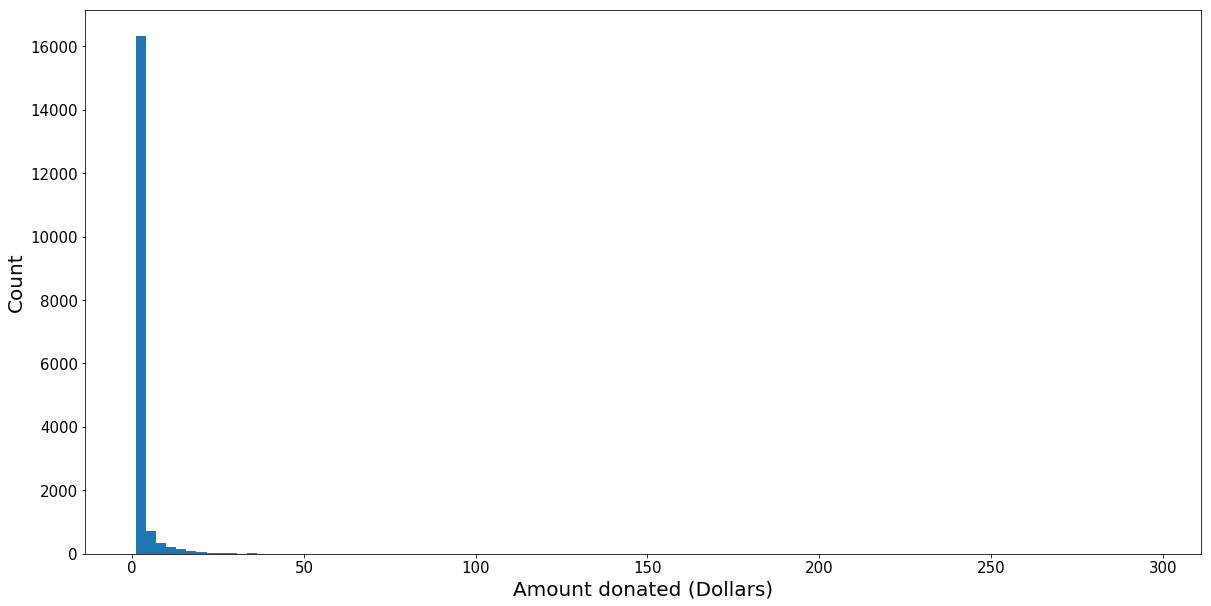

In [77]:
plt.figure(figsize = (20,10))
plt.hist(top_donor_df['amount'], bins = 100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Amount donated (Dollars)', fontsize = 20);
#plt.yscale('log');
#plt.xlim(0, 10);